**Loading the required libraries**

In [0]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

**Exploratory analysis of data**

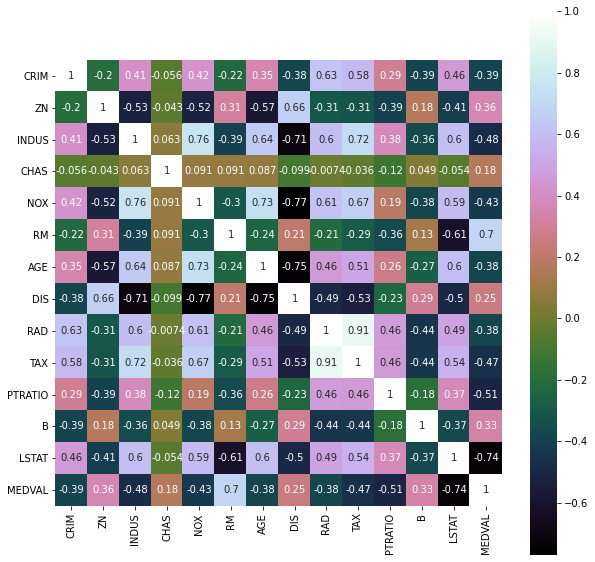

In [29]:
boston = pd.DataFrame(datasets.load_boston().data, columns=datasets.load_boston().feature_names)
plt.figure(figsize=(10,10))
boston['MEDVAL'] = datasets.load_boston().target
sns.heatmap(boston.corr(),vmax=1, square=True,annot=True,cmap='cubehelix',xticklabels=True,yticklabels=True)

**Loading and splitting of dataset**

In [35]:
Y=datasets.load_boston().target
X=datasets.load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

#To ensure mean=0 and std=1 for feature and preventing errors in addition and multiplication
#so it scales the features accordingly
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

#Adding the MEDVAL Column in the dataframe to be passed to the function and choosing 
#only 4 relevant columns based on the correlation matrix- RM(0.7), PTRATIO(-0.51),LSTAT(-0.74)
train_data=pd.DataFrame(x_train)
train_data['MEDVAL']=y_train
columns = [0,1,2,3,4,6,7,8,9,11]
train_data.drop(columns, inplace=True, axis=1)

#Making adjustments in the test data accordingly
x_test=np.array(x_test)
x_test = np.delete(x_test, [0,1,2,3,4,6,7,8,9,11], 1)
y_test=np.array(y_test)

#Printing dataset
print(train_data)
print("Train data dimensions(X,Y) dimensions: ",train_data.shape)
print("Test data(X) dimensions: ",x_test.shape)
print("Test data(Y) dimensions: ",y_test.shape)

            5        10        12  MEDVAL
0   -0.588137  0.202995 -0.674488    22.0
1   -1.403568  0.809606  1.627725    12.0
2    0.833895 -0.496942 -0.423860    27.5
3   -0.394934  0.156332 -0.341687    17.5
4    1.225984 -0.310292 -1.123700    37.9
..        ...       ...       ...     ...
349  0.201723  0.809606  2.194718     7.2
350 -0.599502  0.296320  0.184220    22.0
351  0.117907  0.063007 -0.499185    28.1
352  2.170690 -0.216967 -1.294893    43.8
353  0.936179 -0.496942 -0.453990    26.7

[354 rows x 4 columns]
Train data dimensions(X,Y) dimensions:  (354, 4)
Test data(X) dimensions:  (152, 3)
Test data(Y) dimensions:  (152,)


**Stochastic gradient descent function**

In [0]:
def SGD(trainingData,learningRate,epoch,div):
    
    #Initialising slope and intercept
    m=np.zeros(shape=(1,trainingData.shape[1]-1))
    c=0

    count = 1
    while(count<=epoch): 

        #A temporary dataset of size div
        stored=trainingData.sample(div)
        
        #X and Y are created from store i.e for X drop target and store target in Y
        y=np.array(stored['MEDVAL'])
        x=np.array(stored.drop('MEDVAL',axis=1))
        
        #Similarly re initialising slope and intercept
        m_grad=np.zeros(shape=(1,trainingData.shape[1]-1))
        c_grad=0
        
        #Finding slope and gradient over X and Y to iterate with
        for i in range(div): 
            hypothesis = np.dot(m,x[i])+c
            m_grad = m_grad+(-2)*x[i]*(y[i]-(hypothesis))
            c_grad = c_grad+(-2)*(y[i]-(hypothesis))
        
        #Updating slope and intercept values for the whole
        m=m-learningRate*(m_grad/div)
        c=c-learningRate*(c_grad/div)
        
        #Incrementing the counter
        count = count+1
 
    return m,c 

**Predict function**

In [0]:
def hypothesis(x,m,c):
    y_pred=[]
    #Predicting Y against X for given slope and gradient
    for i in range(len(x)):
        y=np.asscalar(np.dot(m,x[i])+c)
        y_pred.append(y)
    return np.array(y_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  after removing the cwd from sys.path.


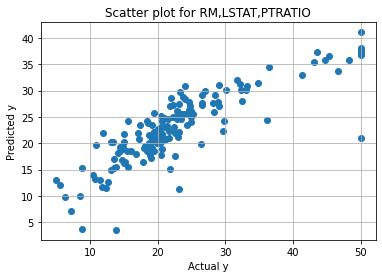

Mean Squared Error : 28.107278082283344
CPU times: user 11.1 s, sys: 131 ms, total: 11.2 s
Wall time: 11.1 s


In [36]:
%%time
m,c = SGD(train_data,0.001,10000,10)
y_pred = hypothesis(x_test,m,c)
#Visualising the result
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel('Test values of Y')
plt.ylabel('Predicted values of Y')
plt.title('Scatter plot for RM,LSTAT,PTRATIO')
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))